In [293]:
import numpy as np
import matplotlib.pyplot as plt

In [294]:
tetta = 25.02
vib = list()
n = 100
a = np.random.uniform(tetta, 2 * tetta, n)
a
betta = 0.95
def alpha_1(a):
    return sum(a)/n
def alpha_2(a):
    return sum(a ** 2)/n
print(a)

[49.53984422 32.07236297 37.88999549 43.83346053 44.9555813  38.27980035
 43.7833018  31.00348398 34.68472479 30.15816704 27.02554726 36.46029384
 42.81549855 43.34115889 39.28399995 46.48045227 26.30644744 46.16023881
 33.74257659 48.80540569 47.69694254 26.50427655 48.62986594 26.29968743
 48.10633381 33.53546465 37.54015199 28.92253768 36.27261669 27.41680391
 25.09369395 28.29750842 26.16797766 39.35977927 38.66308687 45.14072209
 35.58820133 38.7739599  25.23816768 40.25828346 33.67310235 45.77776726
 46.6685134  44.75567713 44.5184879  48.28443156 30.23771656 32.87980915
 46.12929683 48.45996166 27.24385251 46.58938501 38.95064808 25.99808953
 27.3768729  26.47042963 39.91194217 39.13886296 39.99217239 29.42882817
 34.09525067 28.62112724 29.31336946 49.85792528 39.29324175 41.20004427
 35.25197277 29.93964876 35.25830226 38.1029223  27.31463344 40.19252537
 27.33849584 42.57630396 26.48519146 42.83869437 43.36820938 32.73590605
 27.24963513 27.56237023 25.74076167 42.08705011 48

## Проверка доверительных интервалов: n = 100, доверительная вероятность = 0.95

# Точный доверительный интервал

In [295]:
def exact(a, betta = 0.95):
    left_part_exact = max(a) / (((1 + betta) / 2) ** (1/n) + 1)
    right_part_exact = max(a) / (((1 - betta) / 2) ** (1/n) + 1)
    print('              ТОЧНЫЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ')
    print(left_part_exact,'< theta <', right_part_exact)
    print('Длина точного доверительного интервала равна', right_part_exact - left_part_exact)
    print()
    return left_part_exact, right_part_exact

#### Асимтотический доверительный интервал для $\tilde{\theta} = \frac{2}{3}x_{ср}$

In [296]:
def as_OMM(a, betta = 0.95):
    left_part_as_OMM = -1.96 * 2/3 * (alpha_2(a) - alpha_1(a) ** 2) ** (1/2) / (n) ** (1/2) + 2/3 * np.mean(a)
    right_part_as_OMM = 1.96 * 2/3 * (alpha_2(a) - alpha_1(a) ** 2) ** (1/2) / (n) ** (1/2) + 2/3 * np.mean(a)
    print('         АСИМПТОТИЧЕСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (ОММ)')
    print(left_part_as_OMM, '< theta', right_part_as_OMM)
    print('Длина асимптотического доверительного интервала равна', right_part_as_OMM - left_part_as_OMM)
    print()
    return left_part_as_OMM, right_part_as_OMM

In [297]:
def get_bootstrap_sample(x, B_sample = 1000):
    N = len(x)
    result = list()
    for i in range (B_sample):
        sample = np.random.choice(x, size = N, replace = True)
        if (B_sample == 1):
            sample = sample.T[0]
        result.append(sample)
    return result

## Построение бутстраповского доверительного интервала (непарам.) для $\tilde{\theta} = \frac{2}{3}x_{ср}$

In [298]:
def boot_OMM_nep(a):
    origin_mean = 2/3 * a.mean()
    sample = np.array(get_bootstrap_sample(a))
    boot_mean = list()
    for i in range(1000):
        boot_mean.append(2/3 * sample[i].mean())
    boot_mean = np.array(boot_mean)
    delta = boot_mean - origin_mean
    delta.sort()
    k1 = 24
    k2 = 974
    left_part_OMM_nep = origin_mean - delta[k2]
    right_part_OMM_nep = origin_mean - delta[k1]
    print('   БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (НЕПАРАМЕТРИЧЕСКИЙ) ДЛЯ ОММ')
    print(left_part_OMM_nep, '< theta <', right_part_OMM_nep)
    print('Длина бутстраповского доверительного интервала (непарам.) равна', right_part_OMM_nep - left_part_OMM_nep)
    print()
    return left_part_OMM_nep, right_part_OMM_nep


## Построение бутстраповского доверительного интервала (парам.) для $\tilde{\theta} = \frac{2}{3}x_{ср}$

In [299]:
def boot_OMM_par(a):
    origin_mean = 2/3 * a.mean()
    tetta = origin_mean
    n = 100
    sample = list()
    sample_grade = list()
    for i in range(50000):
        sample.append(np.random.uniform(tetta, 2 * tetta, n))
        sample_grade.append(2 / 3 * sample[i].mean())
    sample = np.array(sample)
    sample_grade = np.array(sample_grade)
    sample_grade.sort()
    k1 = 1249
    k2 = 48749
    left_part_OMM_par = sample_grade[k1]
    right_part_OMM_par = sample_grade[k2]
    print('    БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (ПАРАМЕТРИЧЕСКИЙ) ДЛЯ ОММ')
    print(left_part_OMM_par, '< theta <', right_part_OMM_par)
    print('Длина бутстраповского доверительного интервала (парам.) равна', right_part_OMM_par - left_part_OMM_par)
    print()
    return left_part_OMM_par, right_part_OMM_par

## Построение бутстраповского доверительного интервала (непарам.) для $\tilde{\theta} = \frac{x_{max}}{2} $

In [300]:
def boot_OMP_nep(a):
    origin_max = 1/2 * max(a)
    sample = np.array(get_bootstrap_sample(a))
    boot_max = list()
    for i in range(1000):
        boot_max.append(1/2 * sample[i].max())
    boot_max = np.array(boot_max)
    delta = boot_max - origin_max
    delta.sort()
    k1 = 24
    k2 = 974
    right_part_OMP_nep = origin_max - delta[k1]
    left_part_OMP_nep = origin_max - delta[k2]
    print('   БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (НЕПАРАМЕТРИЧЕСКИЙ) ДЛЯ ОМП')
    print(left_part_OMP_nep, '< theta <', right_part_OMP_nep)
    print('Длина бутстраповского доверительного интервала равна (непарам)', right_part_OMP_nep - left_part_OMP_nep)
    print()
    return left_part_OMP_nep, right_part_OMP_nep

## Построение бутстраповского доверительного интервала (парам.) для $\tilde{\theta} = \frac{x_{max}}{2} $

In [301]:
def boot_OMP_par(a):
    origin_max = 1/2 * max(a)
    tetta = origin_max
    n = 100
    sample = list()
    sample_grade = list()
    for i in range(50000):
        sample.append(np.random.uniform(tetta, 2 * tetta, n))
        sample_grade.append(1 / 2 * sample[i].max())
    sample = np.array(sample)
    sample_grade = np.array(sample_grade)
    sample_grade.sort()
    k1 = 1249
    k2 = 48749
    right_part_OMP_par = sample_grade[k2]
    left_part_OMP_par = sample_grade[k1]
    print('   БУТСТРАПОВСКИЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (ПАРАМЕТРИЧЕСКИЙ) ДЛЯ ОМП')
    print(left_part_OMP_par, '< theta <', right_part_OMP_par)
    print('Длина бутстраповского доверительного интервала (парам.) равна', right_part_OMP_par - left_part_OMP_par)
    print()
    return left_part_OMP_par, right_part_OMP_par

In [314]:
def print_please(tetta = 25.02):
    n = 100
    a = np.random.uniform(tetta, 2 * tetta, n)
    print('Наша прекрасная выборка:')
    print(a)
    print()
    left_part_exact, right_part_exact = exact(a)
    left_part_as_OMM, right_part_as_OMM = as_OMM(a)
    left_part_OMM_nep, right_part_OMM_nep = boot_OMM_nep(a)
    left_part_OMM_par, right_part_OMM_par = boot_OMM_par(a)
    left_part_OMP_nep, right_part_OMP_nep = boot_OMP_nep(a)
    left_part_OMP_par, right_part_OMM_par = boot_OMP_par(a)
    plt.plot((left_part_exact, right_part_exact), (0, 0), label= "Точный")
    plt.plot((left_part_as_OMM, right_part_as_OMM), (1, 1), label= "ОММ (асимптотически)")
    plt.plot((left_part_OMM_par, right_part_OMM_par), (2, 2), label= "ОММ (параметрический бутстрап")
    plt.plot((left_part_OMM_nep, right_part_OMM_nep), (3, 3), label = "ОММ (непараметрический бутстрап)")
    plt.plot((left_part_OMP_par, right_part_OMP_par), (4, 4), label= "ОМП (параметрический бутстрап)")
    plt.plot((left_part_OMP_nep, right_part_OMP_nep), (5, 5), label= "ОМП (непараметрический бутстрап)")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()


# ОБЩИЙ РЕЗУЛЬТАТ

Наша прекрасная выборка:
[29.59815153 26.00815966 39.65230477 47.99295694 27.1972734  34.38764672
 42.83927519 35.1944627  32.50447806 38.57110562 38.16294653 25.17968222
 34.62605424 44.39732872 25.86349522 49.51223259 44.37884809 39.75675596
 43.5336587  38.11001865 49.5585801  36.65560007 31.73708153 37.38297825
 43.6234608  30.60217939 31.79935214 46.71083307 46.88592836 27.22143569
 44.08005552 31.00282914 32.58412614 43.60769575 35.92936646 49.89566292
 41.68930988 38.82808934 27.58687834 38.88913497 31.88669653 32.1494332
 28.71906871 46.96485689 40.50419822 30.32937969 40.11567484 32.60659583
 36.86147971 47.43567322 34.76568344 36.64179055 41.44716507 42.57451892
 32.33003743 31.477442   38.360527   27.29410723 28.21045054 27.09392356
 43.34046611 29.59545702 29.670597   48.35658227 29.70016046 37.55105018
 29.90678656 33.45353368 33.0097618  49.67334269 43.80472778 48.11061237
 37.82562791 45.99321456 27.95360388 25.50695479 47.06636056 44.35286012
 28.83517238 43.50686515 29

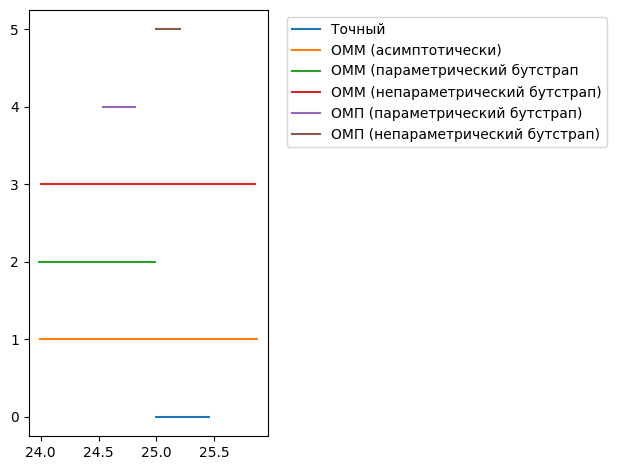

In [315]:
print_please()